# Trabalho Final da disciplina de Métodos Matemáticos em Engenharia Eletrônica
### <p align="center">Grupo 5</p>

### Integrantes do grupo:    <p align ="center">Wagner Franco da Silva Junior</p>
###                          <p align ="center">Afonso Mateus</p>
###                          <p align ="center">Kevin Flauzino</p>
###                          <p align ="center">Matheus Táboas</p>  

In [1]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import numpy as np
import math as m
import sympy

### Questão 1 - A:

In [2]:
x=0
j=0
for i in range(1, 11):
    x = x + ((5*(i**2)) +30) / i**4
    print(i, "-->", x)

    j = j +1

j = j + 1
y = ((5*(j**2)) +30) / j**4

print("\nValor final ----> ", x)
print("|erro| < |", y, "|")

1 --> 35.0
2 --> 38.125
3 --> 39.050925925925924
4 --> 39.480613425925924
5 --> 39.72861342592592
6 --> 39.89065046296296
7 --> 40.005186073125394
8 --> 40.090635291875394
9 --> 40.1569361606454
10 --> 40.2099361606454

Valor final ---->  40.2099361606454
|erro| < | 0.04337135441568199 |


### Questão 1 - B:

In [3]:
x=0
y=1
i=1
while(y > 0.001): 
    x = x + ((5*(i**2)) +30) / i**4 #S     

    j = i+1
    y = ((5*(j**2)) +30) / j**4  #Erro    

    i = i + 1

i = i - 1
z = ((5*(i**2)) +30) / i**4  #Sn   

print("Termos necessários ----> ", i)
print("Sn ----> ", z)
print("S -----> ", x)
print("|erro| ----> ", y)

Termos necessários ---->  70
Sn ---->  0.0010216576426488964
S ----->  40.62341801305567
|erro| ---->  0.0009930472525607416


### Questão 2 - A

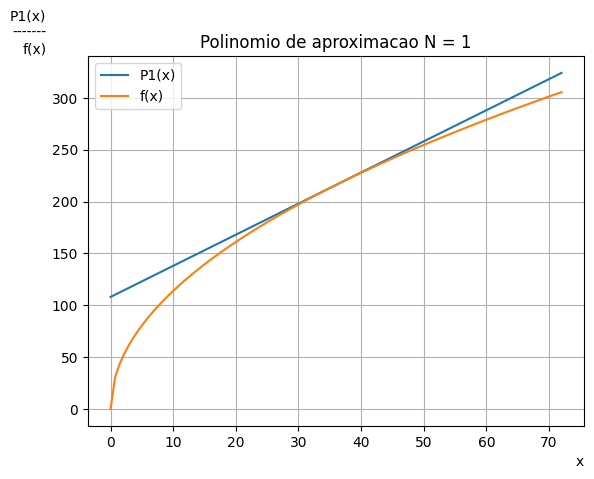

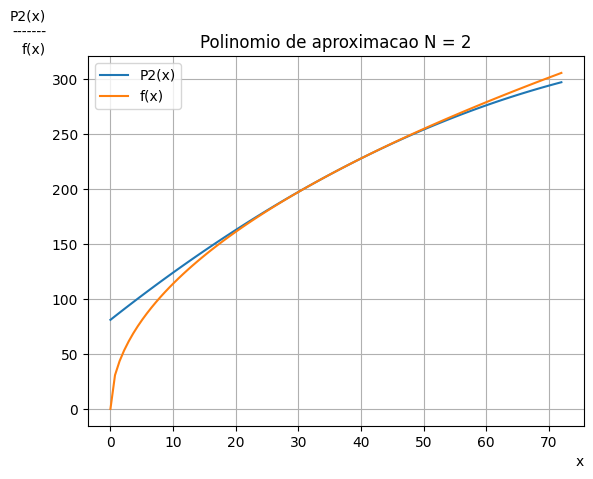

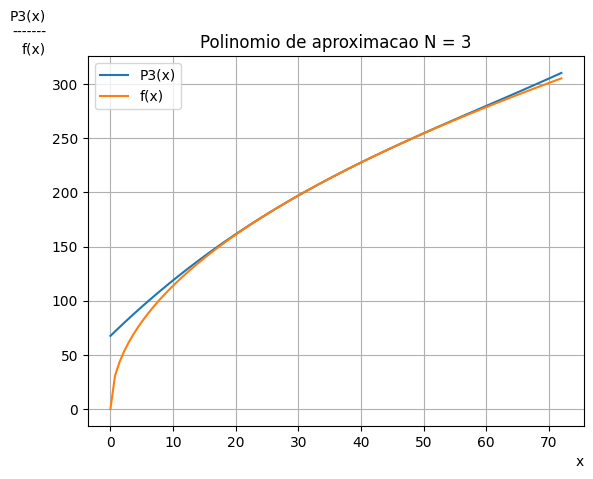

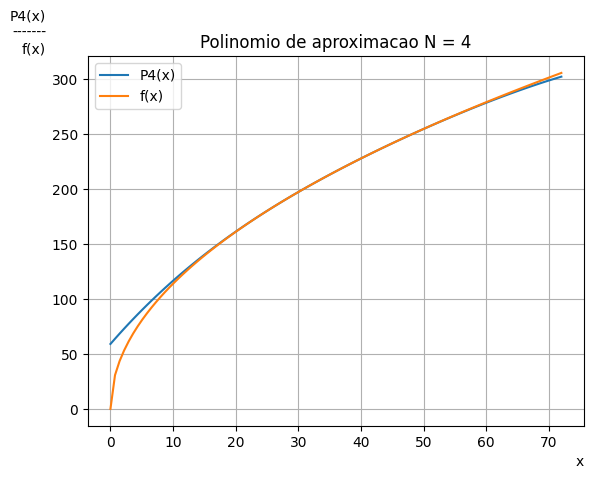

P0(x) = 216.000000000000
P1(x) = 3.0*x + 108.0
P2(x) = 3.0*x - 0.0208333333333333*(x - 36)**2 + 108.0
P3(x) = 3.0*x + 0.000289351851851852*(x - 36)**3 - 0.0208333333333333*(x - 36)**2 + 108.0
P4(x) = 3.0*x - 5.02346965020576e-6*(x - 36)**4 + 0.000289351851851852*(x - 36)**3 - 0.0208333333333333*(x - 36)**2 + 108.0



In [4]:
def Quest2a(N,inicio=0,fim=72,plotar='nao',MostrarPolinomios='nao'):
    x = sympy.symbols('x')
    f = 36*x**(1/2)
    n = 0
    P = 0
    Polinomios = []

    while n <= N:
        dif = sympy.diff(f, x, n)
        
        P += (dif.subs(x, 36)*(x-36)**n)/sympy.factorial(n)
        
        Polinomios += [P]

        n += 1
    if plotar == 'sim':    
        Poli = sympy.lambdify(x, P, modules=['numpy'])
        funcao = sympy.lambdify(x, f, modules=['numpy'])

        abscissa = np.linspace(inicio, fim, 100)
        ordenada = Poli(abscissa)

        plt.plot(abscissa, ordenada, label='P(x)')
        plt.ylabel (f'P{N}(x)\n-------\nf(x)', rotation=0, loc='top')
        plt.xlabel ('x', loc='right')
        plt.title (f'Polinomio de aproximacao N = {N}')

        plt.plot(abscissa, funcao(abscissa), label='f(x)')

        plt.legend([f'P{N}(x)','f(x)'])

        plt.grid()
    
        plt.show()
        
        n = 0
        for polinomio in Polinomios:
            if MostrarPolinomios == 'sim':
                print (f'P{n}(x) = {polinomio}')
            n += 1
    
    return ''


print(Quest2a(1,plotar='sim'))
print(Quest2a(2,plotar='sim'))
print(Quest2a(3,plotar='sim'))
print(Quest2a(4,plotar='sim',MostrarPolinomios='sim'))

### Questão 2 - B

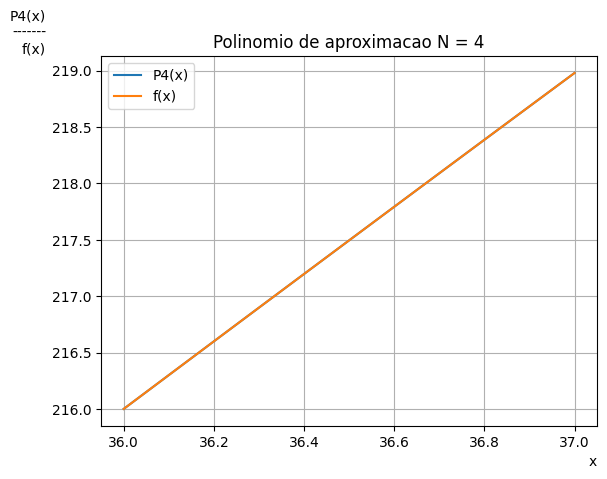

|erro| <= 0.00000100469393004115


In [5]:
P4 = Quest2a(4,36,37,'sim')
x = sympy.symbols('x')
f = 36*x**(1/2)
    
f4 = sympy.diff(f, x, 4)
        
R4 = (f4.subs(x, 36)*(x-36)**5)/sympy.factorial(5)

M = sympy.minimum(f4, x, sympy.Interval(36,37))
'''f4 é negativo'''

R4Taylor = (abs(M)/sympy.factorial(5))*1**5

print(f'|erro| <= {R4Taylor}')
              

### Questão 3 - A, B e C

In [6]:
#Letra A)

# Dados de α e p20 fornecidos pela questao:

alfa =  0.006
resis = 7 *(10**-8)

# Calculando valores da aproximação linear e quadrática:

#P1 = Aproximação Linear;
#P2 = Aproximação Quadrática;

def P(t):
    return resis * np.exp(alfa*(t-20))

def linear(t):
    return resis * (1 + alfa*(t-20))

def quadratica(t):
    return resis * (1 + alfa * (t - 20) + (alfa^2 * (t - 20)**2)/2)

In [7]:
#Letra B)

#Definindo o domínio e imagem da função e de seus polinômios

x = np.linspace(-250,1000,1000)             # Intervalo pedido
y0 = resis*(m.e**(alfa*(x-20)))             # Função
y1 = resis*(1 + alfa*(x-20))                # Poli. grau 1
y2 = (y1 + resis*((alfa**2)*((x-20)**2))/2) # Poli. grau 2      


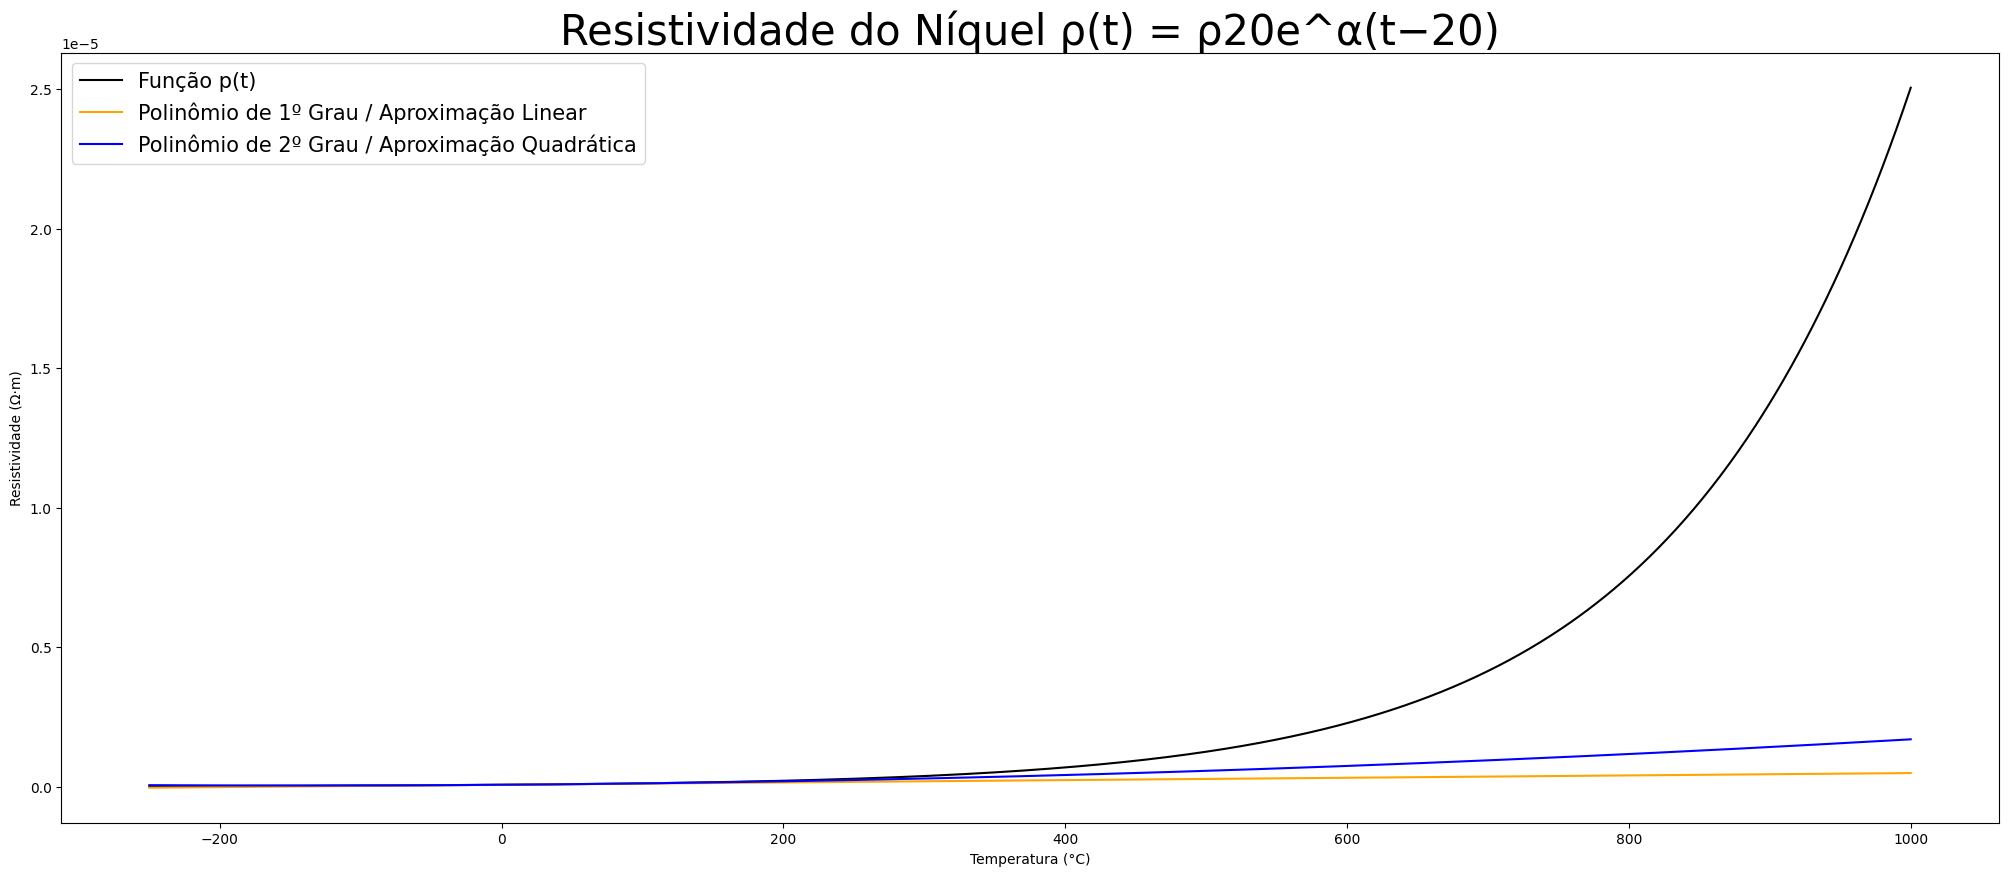

In [8]:
#Plotando o gráfico da função e dos polinômios de primeiro e segundo grau

plt.rcParams["figure.figsize"]=25,10
fig, ax = plt.subplots()

ax.plot(x, y0, 'black', label='Função p(t)')
ax.plot(x, y1, 'orange', label='Polinômio de 1º Grau / Aproximação Linear')
ax.plot(x, y2, 'blue', label='Polinômio de 2º Grau / Aproximação Quadrática')

ax.set_title("Resistividade do Níquel ρ(t) = ρ20e^α(t−20)", fontsize='30')
ax.set_xlabel("Temperatura (°C)")
ax.set_ylabel("Resistividade (Ω·m)")
leg = ax.legend(loc='upper left', fontsize='15')

In [19]:
#Letra C)

t = np.arange(-250,1000,0.1)
y = resis*(np.exp(alfa*(x-20)))
aprox_linear = [resis*(1 + alfa*(i-20)) for i in x]
k = []

for i in t:
    Funcao3 = resis*(np.exp(alfa*(i-20)))
    aproximacao_Linear2 = resis*(1 + alfa*(i-20))
    if abs(Funcao3 - aproximacao_Linear2) <= (00.1)*Funcao3:
        k.append(i)
 
print(round(min(k)),1)
print(round(max(k)),1)

-45 1
109 1


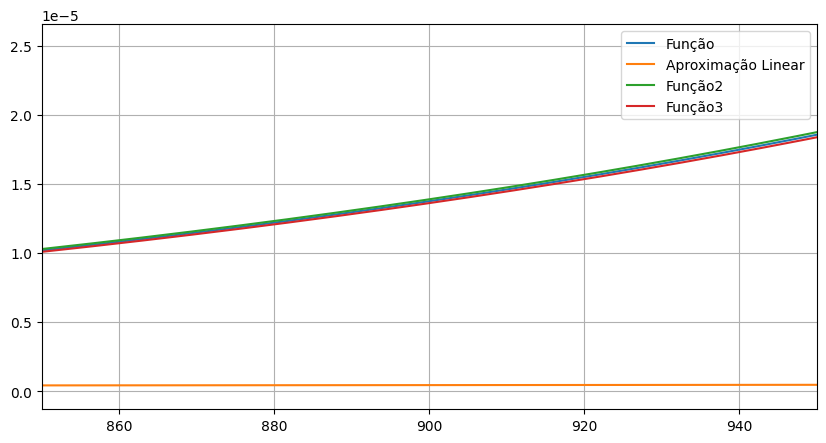

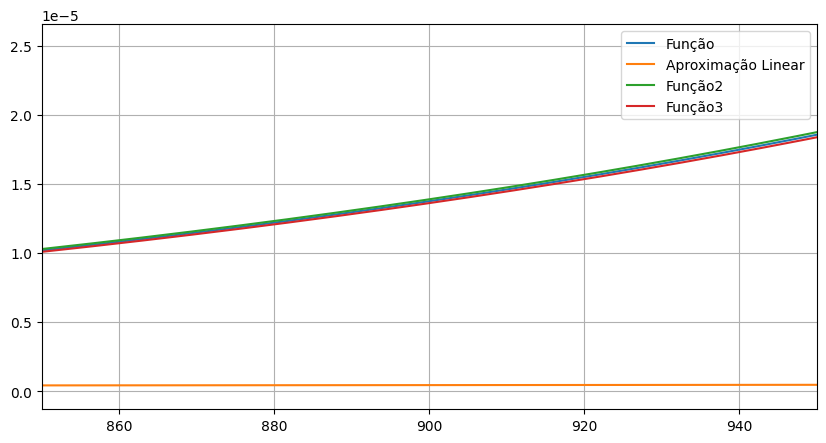

In [54]:
fig2, img2 = plt.subplots(figsize = (10,5))
img2.plot(t,y)
img2.plot(t,aprox_linear)
img2.plot(t,1.01*y)
img2.plot(t,0.99*y)

img2.set_xlim ([850,950])

img2.legend(['Função','Aproximação Linear','Função2','Função3'], fontsize = 10)

plt.grid()
plt.show()

fig3, img3 = plt.subplots(figsize = (10,5))
img3.plot(t,y)
img3.plot(x,aprox_linear)
img3.plot(t,1.01*y)
img3.plot(t,0.99*y)

img3.set_xlim ([850,950])

img3.legend(['Função','Aproximação Linear','Função2','Função3'], fontsize = 10)

plt.grid()
plt.show()

### Questão 4 - E, F e G

In [11]:
#Definindo a superfície
x = np.linspace(-2,4,100)
y = np.linspace(-2,2,100)
x,y = np.meshgrid(x,y)
u = x**2 - y**2 - 2*x + 2
v = 2*x*y - 2*y

#Curva para Re(w)=0
x1 = np.linspace(1 - np.sqrt(3), 1 + np.sqrt(3), 100)
y1 = np.sqrt(1 + (x1-1)**2)
u1 = x1**2 - y1**2 - 2*x1 + 2

#Curva para o caso 1 de Im(w)=0, x=1
x2 = np.linspace(1,1,100)
y2 = np.linspace(-2,2,100)
u2 = 1 - y2**2 

#Curva para o caso 2 de Im(w)=0, y=0
x3 = np.linspace(-2,4,100)
y3 = np.linspace(0,0,100)
u3 = (x3-1)**2 + 1

In [12]:
#Plotando o gráfico da superfície conforme as orientações do trabalho

fig= go.Figure()
fig.add_surface(z=u, x=x, y=y,surfacecolor=v,colorscale = 'jet') # Superfície

# Curva para u = 0
fig.add_scatter3d(x=x1, y=y1, z=u1, mode="lines",name='u=0', line=dict(color="black",colorscale='blackbody', width=5))
fig.add_scatter3d(x=x1, y=-y1, z=u1, mode="lines", showlegend=False, line=dict(color="black",colorscale='blackbody', width=5))

# Curva para v = 0
fig.add_scatter3d(x=x2, y=y2, z=u2, mode="lines",name='v=0', line=dict(color="blue",colorscale='blackbody', width=5))
fig.add_scatter3d(x=x3, y=y3, z=u3, mode="lines", showlegend=False, line=dict(color="blue",colorscale='blackbody', width=5))

fig.update_layout(title='w = f(z) = z² - 2z + 2', legend=dict(x=0,y=1), autosize=False, width=800, height=600,scene = dict(xaxis_title='x',yaxis_title='y',zaxis_title='u(x,y)'))

fig.show()